In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('../input/titanic/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Análise exploratória de dados

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

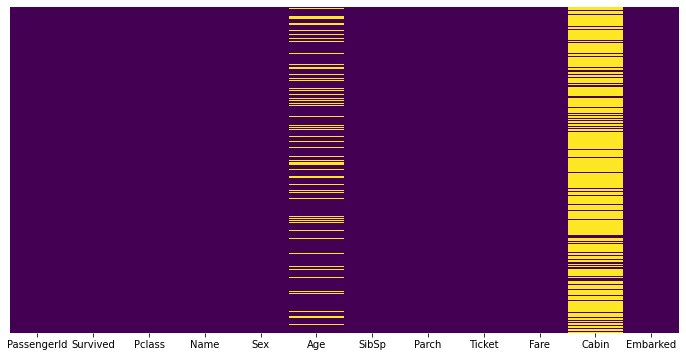

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#yticklabels=False serve para tirar a barra do eixo y
#cbar=False serve para tirar a barrinha de cores que fica do lado direito
#cmap='viridis' muda a cor do mapa para roxo

In [7]:
sns.set_style('whitegrid')
#sns.set_style('whitegrid') serve para mudar o fundo do grafico

<AxesSubplot:xlabel='Survived', ylabel='count'>

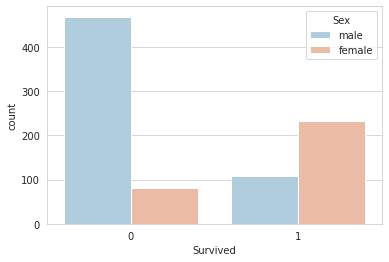

In [8]:
sns.countplot(x='Survived', data= train, hue='Sex', palette= 'RdBu_r')
#hue='Sex' vai criar uma segregação no grafico
#palette= 'RdBu_r' muda a paelta de cores

<AxesSubplot:xlabel='Survived', ylabel='count'>

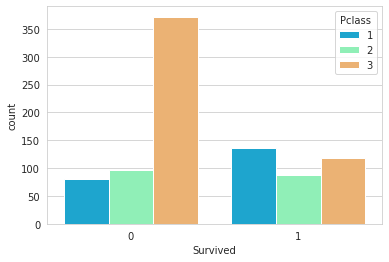

In [9]:
sns.countplot(x='Survived', data= train, hue='Pclass', palette= 'rainbow')

<AxesSubplot:>

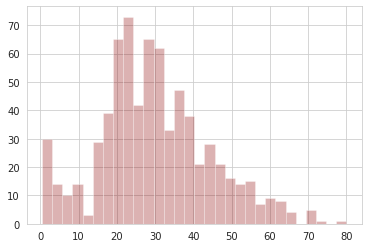

In [10]:
train['Age'].hist(bins=30, color='darkred', alpha=0.3)
#alpha=0.3 transparencia do grafico

<AxesSubplot:xlabel='SibSp', ylabel='count'>

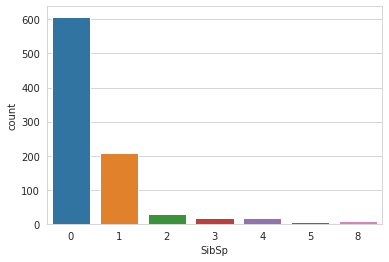

In [11]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

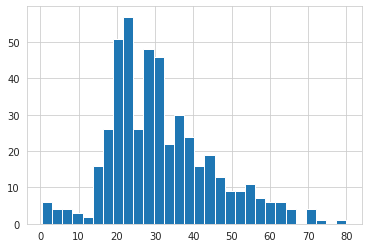

In [12]:
train[train['SibSp'] == 0]['Age'].hist(bins=30)

<AxesSubplot:>

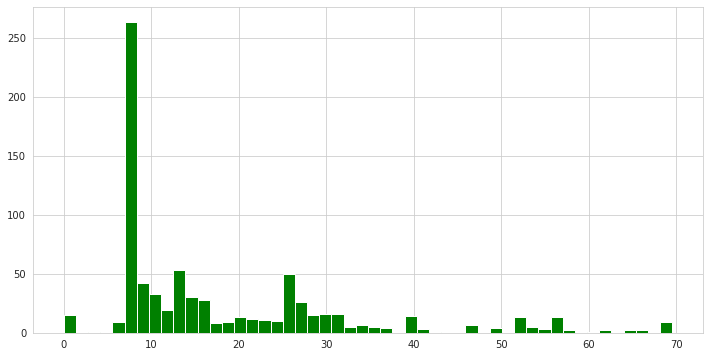

In [13]:
train[train['Fare'] < 70]['Fare'].hist(color='green', bins=50, figsize=(12,6))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

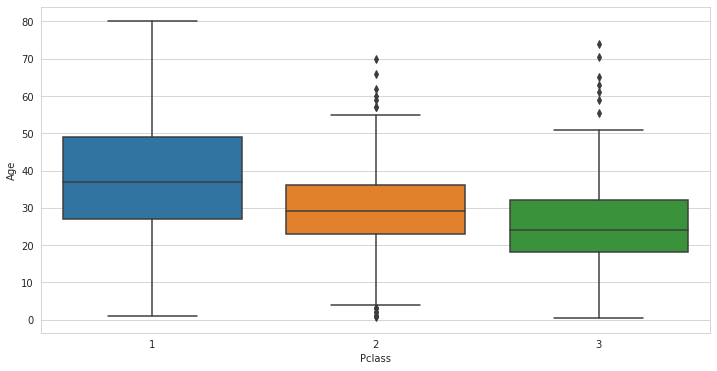

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data = train)

# Data Sciencie

In [15]:
def imputar_idade(cols):
    idade=cols[0]
    classe=cols[1]
    
    if pd.isnull(idade):

      if classe == 1:
        return 37

      elif classe ==2:
        return 29

      else:
        return 24
    else:
      return idade
#Programa para completar os dados faltantes com as medias de idade das classes

In [16]:
train['Age']=train[['Age','Pclass']].apply(imputar_idade,axis=1)

In [17]:
train.drop('Cabin',inplace=True,axis= 1)
#apagando a coluna cabin
#axis=1 referece a coluna axis = 0 referece a linha 

In [18]:
train.dropna(inplace=True)

<AxesSubplot:>

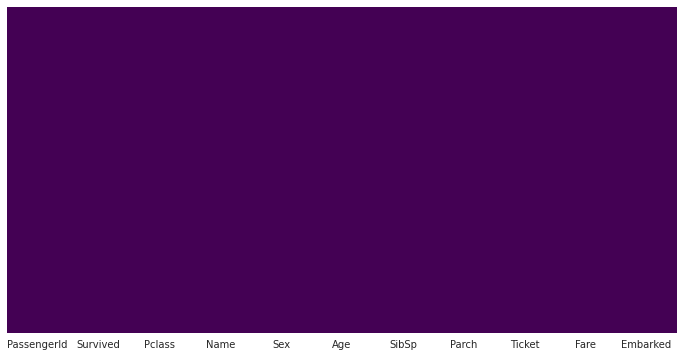

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
#pd.get_dummies serve para transformar em numerico
#drop_first=True excluir a primeira coluna gerada

In [21]:
embarque = pd.get_dummies(train['Embarked'], drop_first=True)
embarque

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [22]:
train.drop(['Sex','PassengerId','Ticket','Name','Embarked'], axis=1, inplace= True)

In [23]:
train = pd.concat([train,sex,embarque], axis=1 )

In [24]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Treino/Teste

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),train['Survived'], test_size=0.3)

In [27]:
logmodel = LogisticRegression(max_iter=225)

In [28]:
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=225)

In [29]:
predictions = logmodel.predict(x_test)

# Avaliação

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       167
           1       0.75      0.68      0.71       100

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267



In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
print(confusion_matrix(y_test, predictions))

[[144  23]
 [ 32  68]]
